In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv('../../data/processed/preprocessed_cupid.csv', usecols=['age', 'sex','#anwps', 'clean_text', 'isced', 'isced2'])


In [4]:
df.head()
df = df.dropna(subset=['clean_text', 'isced'])

# import contractions
# df['clean_textk'] = df['clean_text'].str.lower()


# def expand_contractions(text):
#     expanded = contractions.fix(text)
#     return expanded

# df['v'] = df.apply(lambda x: expand_contractions(x['clean_textk']), axis=1)


In [5]:
# df['s']

## Imbalanced datasets
### In a dataset with highly imbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate


In [ ]:
df.isced.value_counts().plot(kind='bar', title= 'Count target')
outcome = pd.crosstab(index=df['isced'], columns='count')
outcome

In [7]:
# # Remove classes 1, 5 and 8 from dataset
df = df[df['isced'].isin([6.0, 7.0, 3.0])]

In [8]:
# df.isced.value_counts().plot(kind='bar', title= 'Count target')

In [9]:
def plot_conf(conf_matrix):
    print('Confusion matrix:\n', conf_matrix)
    labels = ['3', '6', '7', '8']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()

In [10]:
df = df.dropna(subset=['clean_text', 'isced'])
# df = df.dropna(subset=['stemmed', 'isced'])

corpus = df['clean_text']
# corpus = df['stemmed']
target = df["isced"]
# frequency encoding scikit-learn
vectorizer = CountVectorizer(binary=False, ngram_range=(1, 2))
vectors = vectorizer.fit_transform(corpus)
X_train, X_val, y_train, y_val = train_test_split(vectors, target, train_size=0.75,
                                                          test_size=0.25, random_state = 0)

In [11]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


Using TensorFlow backend.


In [12]:
# rus = RandomUnderSampler(random_state=42)
# X_res, y_res = rus.fit_resample(X_train, y_train)
# y_res.value_counts().plot(kind='bar', title= 'Count target')


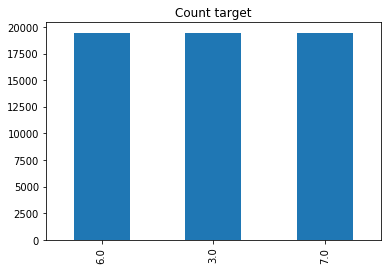

In [13]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)
y_ros.value_counts().plot(kind='bar', title= 'Count target')

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import pandas as pd



model = make_pipeline(MultinomialNB())



In [15]:
model.fit(X_ros, y_ros)

Pipeline(memory=None,
         steps=[('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [16]:
gnb_predictions = model.predict(X_val)


Final Accuracy for NB: 0.605765005712277
Confusion matrix:
 [[1325  990  108]
 [ 700 4897  812]
 [ 145 1731  671]]


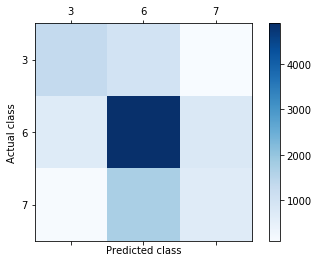

              precision    recall  f1-score   support

         3.0       0.61      0.55      0.58      2423
         6.0       0.64      0.76      0.70      6409
         7.0       0.42      0.26      0.32      2547

    accuracy                           0.61     11379
   macro avg       0.56      0.52      0.53     11379
weighted avg       0.59      0.61      0.59     11379



In [17]:
print("Final Accuracy for NB: %s"% accuracy_score(y_val, gnb_predictions))
cm = confusion_matrix(y_val, gnb_predictions) 
plot_conf(cm)
from sklearn.metrics import classification_report

print(classification_report(y_val, gnb_predictions))

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, multi_class='ovr', solver='liblinear').fit(X_ros, y_ros)
logistic_predictions = clf.predict(X_val)
print("Final Accuracy for NB: %s"% accuracy_score(y_val, logistic_predictions))
cm = confusion_matrix(y_val, logistic_predictions) 
plot_conf(cm)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg').fit(X_ros, y_ros)
logistic_predictions = clf.predict(X_val)
print("Final Accuracy for NB: %s"% accuracy_score(y_val, logistic_predictions))
cm = confusion_matrix(y_val, logistic_predictions) 
plot_conf(cm)

In [14]:
# from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix,classification_report
# from sklearn.model_selection import cross_val_score, GridSearchCV

In [15]:
# params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


In [ ]:
# svm_model = GridSearchCV(SVC(), params_grid, cv=5)
# svm_model.fit(X_train, y_train)
# print('Best score for training data:', svm_model.best_score_,"\n") 

# # View the best parameters for the model found using grid search
# print('Best C:',svm_model.best_estimator_.C,"\n") 
# print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
# print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")



In [ ]:
# final_model = svm_model.best_estimator_
# Y_pred = final_model.predict(X_val)
# print(confusion_matrix(y_val,Y_pred))
# print("\n")
# print(classification_report(y_val,Y_pred))

# print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
# print("Testing  set score for SVM: %f" % final_model.score(X_val  , y_val ))

# svm_model.score